<a href="https://colab.research.google.com/github/nischithakn800-ux/import-export-dataset/blob/main/CTGAN_MajorProjectEDA_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------

# **Project Title:**

# **MEDSYNTH: PREDICTIVE ANALYTICS FOR SYNTHETIC PATIENT DATA**


-------------------------------------------------------------

**Project Type :**
 EDA + Hypothesis Testing + Supervised & Unsupervised Models+ Synthetic data Generation (CTGAN)+ Neural Network + Deployment(streamlit).

**Contribution:** Team

**Team Members:**


1.   Fida Taneem
2.   Isha Shrivastava
3.   Manthan M Y
4.   Nischitha K N
5.   Padakandla Venkata Naga Sai Hasini

---------------------------------------------------------


# **Project Summary:**

This project delivers an end-to-end machine learning pipeline for synthetic health data, focused on predicting patient multimorbidity risk. The workflow spans from initial data exploration and cleaning to advanced predictive modelling and production deployment. Key steps include:

- Comprehensive exploratory data analysis (EDA) to uncover trends, outliers, and relationships in health records.

- Rigorous data preprocessing, merging, feature engineering, and encoding to ensure high-quality model-ready datasets.

- Robust risk prediction using state-of-the-art classifiers, with special techniques to address class imbalance and ensure fair, reliable identification of multimorbid (high-risk) patients.

- Use of CTGAN, a generative neural network, to synthesize additional samples for the underrepresented class—greatly improving model performance on rare and critical cases.

- Seamless model deployment, making predictions accessible through user-friendly interfaces suitable for real-world healthcare applications.

This pipeline not only advances machine learning methodology with synthetic data augmentation, but also demonstrates practical value by producing actionable predictions to support better patient outcomes in complex clinical environments.

------------------------------------------------------



### **Objective:**

Predict the risk of multimorbidity using synthetic patient data, augmenting rare classes with CTGAN to improve classifier performance and provide robust, scalable healthcare analytics.

### **Business Context:**

Healthcare providers face rising complexity due to multiple chronic conditions in aging populations.

The goal is to develop predictive models for multimorbidity, enhancing care coordination and supporting patient-centered management.


------------------------------------------------------

### **Subject:** Medical

### **Data Source**: Synthetic patient records  from the Synthea repository(Kaggle).

------------------------------------


**Population:**
Synthetic patient records (11 CSV files) representing diverse demographics from Massachusetts, USA, spanning multiple age groups and ethnicities

**Total count of patient data:** 1462 records

**Key Features:**

- Demographics: Age, gender, race, ethnicity

- Clinical History: Number of conditions, medications, procedures

- Healthcare Utilization: Encounter frequency, total claims amount

- Temporal Data: Birth dates, encounter dates, condition onset/resolution


---------------------------------------




# **DATA PREPROCESSING**

### **1. Data Collection**

**Dataset:** Synthetic healthcare data generated by Synthea, comprising multiple tables: patients, conditions, claims, encounters, medications, etc.

**Scope:** ~1,462 synthetic patient profiles; each linked to a rich set of medical, demographic, and healthcare utilization variables.

**Features:** Demographics (age, gender, race), medical history (number of conditions, medications), financial (total claims), encounters, allergies, and more.


### **2. Cleaning**

- Standardize column names and patient IDs across tables.

- Handle missing values by imputation (median for cost/utilization variables, mode for categorical features).

- Remove duplicate patient records and verify consistent linkage across tables.

- Convert dates to proper datetime format and derive age, encounter years, etc.

- Check and address class imbalance in multimorbidity outcome.

### **3. Feature Engineering**

- Create age groups (Young <35, Middle 35–60, Senior >60).

- Generate risk bins for key numeric variables: high claims, high medication count, frequent encounters.

- Aggregate features per patient (e.g., total conditions, total claims, encounter frequency).

- Develop interaction features (e.g., age × num_conditions, num_meds × total_claims).

- Flag patients meeting high-risk thresholds (e.g., polypharmacy ≥5 meds, high-cost ≥90th percentile claims).

----------------------------------------------

# **TECHNIQUES USED**

## **1. Univariate Analysis**

Histograms: Distribution of claims, age, condition and medication counts.

Boxplots: Detection of cost outliers (total_claims), medication outliers (num_meds).

Barplots/Countplots: Proportion of multimorbid vs non-multimorbid patients.

## **2. Bivariate Analysis**

Scatterplots: Age vs total claims, num_conditions vs num_meds.

Boxplots by Outcome: Compare claims, meds, conditions between multimorbid and other groups.

Violin plots: Visualize distribution differences across multimorbidity status.

## **3. Multivariate Analysis**

Correlation Heatmap: Reveal relationships between utilization, demographic, and outcome variables (e.g., total_claims correlated with num_conditions and num_meds).

Parallel categories plot: Explore categorical interactions among age group, conditions, meds, and claim groups.

Cluster analysis (optional): Group patients by medical complexity for stratification.

## **4. Hypothesis Testing**

T-tests/Mann-Whitney: Compare mean claims/medication counts between multimorbid and non-multimorbid groups.

Chi-square tests: Assess associations between age group, gender, and multimorbidity status.

## **5. Trend/Pattern Analysis**

Age group vs Multimorbidity: Higher prevalence seen in older age groups.

Polypharmacy vs Multimorbidity: Patients with many medications are predominantly multimorbid.

Claims & Encounters: High healthcare costs and frequent encounters often co-occur with multimorbidity.

## **6. Predictive Modelling**
Supervised Classification: Used models such as Random Forest, XGBoost, and Neural Networks to predict whether an individual is multimorbid (≥2 conditions). Models evaluated using metrics like accuracy, recall, ROC-AUC, and confusion matrices.



## **7. Synthetic Data Generation with CTGAN**
Problem Addressed: Imbalanced dataset with far fewer multimorbid cases.

Solution: Used CTGAN (Conditional Tabular GAN), a neural network-based generative model, to synthesize realistic artificial patient records for the minority class.


## **8. Deployment**
Model Export: Saved pre-processing pipeline and trained model artifacts.

User Interface:
 Deployed the predictive pipeline using a web-based dashboard (e.g., Streamlit), enabling interactive risk predictions for new data in real time.

Accessibility: The solution is made usable by clinicians and analysts for practical, point-of-care deployments.

# **GITHUB LINK:**

https://github.com/Fidaaz2521/_CTGAN_Major_Project

--------------------------------------------

# **Let's Begin!**

# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Import the Dataset into Colab

In [2]:
# Load all files
patients = pd.read_csv("https://raw.githubusercontent.com/Fidaaz2521/_CTGAN_Major_Project/main/patients.csv")
allergies = pd.read_csv("https://raw.githubusercontent.com/Fidaaz2521/_CTGAN_Major_Project/main/allergies.csv")
careplans = pd.read_csv("https://raw.githubusercontent.com/Fidaaz2521/_CTGAN_Major_Project/main/careplans.csv")
claims = pd.read_csv("https://raw.githubusercontent.com/Fidaaz2521/_CTGAN_Major_Project/main/claims.csv")
conditions = pd.read_csv("https://raw.githubusercontent.com/Fidaaz2521/_CTGAN_Major_Project/main/conditions.csv")
encounters = pd.read_csv("https://raw.githubusercontent.com/Fidaaz2521/_CTGAN_Major_Project/main/encounters.csv")
immunizations = pd.read_csv("https://raw.githubusercontent.com/Fidaaz2521/_CTGAN_Major_Project/main/immunizations.csv")
medications = pd.read_csv("https://raw.githubusercontent.com/Fidaaz2521/_CTGAN_Major_Project/main/medications.csv")
observations = pd.read_csv("https://raw.githubusercontent.com/Fidaaz2521/_CTGAN_Major_Project/main/observations.csv")
procedures = pd.read_csv("https://raw.githubusercontent.com/Fidaaz2521/_CTGAN_Major_Project/main/procedures.csv")
prevalence = pd.read_csv("https://raw.githubusercontent.com/Fidaaz2521/_CTGAN_Major_Project/main/all_prevalences.csv")

print("Patients:", patients.shape)
print("Conditions:", conditions.shape)
print("Claims:", claims.shape)


Patients: (1462, 17)
Conditions: (7040, 6)
Claims: (20523, 7)


# Dictionary of Datasets

In [3]:
datasets = {
    "patients": patients,
    "allergies": allergies,
    "careplans": careplans,
    "claims": claims,
    "conditions": conditions,
    "encounters": encounters,
    "immunizations": immunizations,
    "medications": medications,
    "observations": observations,
    "procedures": procedures,
    "prevalence": prevalence
}



---------------------------------

# **Comprehensive Data Overview**

    This block gives  a quick health check on each file, spot missing/value and type issues early, and is vital when merging tables.

In [4]:
def comprehensive_data_overview(df, df_name="DataFrame"):

    print("="*60)
    print(f"📊 OVERVIEW OF {df_name.upper()}")
    print("="*60)

    print(f"Shape: {df.shape}")
    print("Columns:", df.columns.tolist())
    print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

    dtype_counts = df.dtypes.value_counts()
    print("Data Types:")
    print(dtype_counts)

    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing_Count': missing_data,
        'Missing_Percentage': missing_percent
    }).sort_values('Missing_Percentage', ascending=False)
    print("Missing Values (Top 10):")
    print(missing_df[missing_df['Missing_Count'] > 0].head(10))

    unique_counts = df.nunique().sort_values(ascending=False)
    print("Unique Count (Top 10):")
    print(unique_counts.head(10))
    print("\nSample Data:")
    print(df.head())
    print("="*60)

    return missing_df, unique_counts




## Displaying the Comprehensive Data Overview

In [5]:
for name, df in datasets.items():
    comprehensive_data_overview(df, name)


📊 OVERVIEW OF PATIENTS
Shape: (1462, 17)
Columns: ['patient', 'birthdate', 'deathdate', 'ssn', 'drivers', 'passport', 'prefix', 'first', 'last', 'suffix', 'maiden', 'marital', 'race', 'ethnicity', 'gender', 'birthplace', 'address']
Memory Usage: 1.31 MB
Data Types:
object    17
Name: count, dtype: int64
Missing Values (Top 10):
           Missing_Count  Missing_Percentage
suffix              1417           96.922025
maiden              1059           72.435021
deathdate           1005           68.741450
marital              429           29.343365
passport             339           23.187415
prefix               296           20.246238
drivers              266           18.194254
Unique Count (Top 10):
patient      1462
address      1462
ssn          1460
birthdate    1431
first        1202
drivers      1189
passport      560
last          453
deathdate     448
maiden        271
dtype: int64

Sample Data:
                                patient   birthdate   deathdate          ssn  \


**Insight:**



This  will print out the size, columns, data types, missing values,common keys and top unique features for every table  loaded.

---------------------------------



# **Data Preprocessing and Cleaning**


## **1. Standardize column names**


In [6]:

def clean_columns(df):
    df.columns = (
        df.columns.str.strip()
                  .str.lower()
                  .str.replace(" ", "_")
                  .str.replace("-", "_")
    )
    if "patient" in df.columns:
        df.rename(columns={"patient": "patient_id"}, inplace=True)
    return df

for k in datasets:
    datasets[k] = clean_columns(datasets[k])



- This function and loop combination cleans and standardizes the column names in every DataFrame in the datasets dictionary.

- It ensures column names in all tables are uniform, easy to type, and ready for downstream merging and manipulation with no naming conflicts or casing errors.

------------------


## **2. Convert date columns**


In [7]:

date_cols = ["birthdate", "deathdate", "start", "stop", "date", "billableperiod"]
for k, df in datasets.items():
    for col in df.columns:
        if col in date_cols:
            df[col] = pd.to_datetime(df[col], errors="coerce")



/tmp/ipython-input-525049238.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors="coerce")
/tmp/ipython-input-525049238.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors="coerce")


- This code converts date columns to proper datetime format across all the datasets.

- This ensures all date-related columns across  entire dataset are properly formatted as datetime objects, making time-based analysis and calculations possible.

-----------------------------------------

## **3. Handle Missing Values**

In [8]:

for k, df in datasets.items():
    # Numeric → 0
    for col in df.select_dtypes(include=["float64", "int64"]).columns:
        df[col].fillna(0, inplace=True)
    # Text → "Unknown"
    for col in df.select_dtypes(include=["object"]).columns:
        df[col].fillna("Unknown", inplace=True)



/tmp/ipython-input-1255799005.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)
/tmp/ipython-input-1255799005.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

- This  fills missing values (NaNs) in every DataFrame in datasets dictionary using different strategies depending on the column type

- It is a practical cleaning step to handle missing values so all datasets are fully populated and ready for analysis or machine learning.


-----------------------------------------------


## **4. Aggregations per patient (Feature Engineering)**

In [9]:

claims_summary = claims.groupby("patient_id").agg(
    total_claims=("total", "sum"),
    num_claims=("total", "count")
).reset_index()

cond_summary = conditions.groupby("patient_id").agg(
    num_conditions=("description", "count")
).reset_index()

med_summary = medications.groupby("patient_id").agg(
    num_meds=("description", "count")
).reset_index()

enc_summary = encounters.groupby("patient_id").agg(
    num_encounters=("id", "count")
).reset_index()

proc_summary = procedures.groupby("patient_id").agg(
    num_procedures=("description", "count")
).reset_index()

obs_summary = observations.groupby("patient_id").agg(
    num_observations=("value", "count")
).reset_index()

immu_summary = immunizations.groupby("patient_id").agg(
    num_immunizations=("description", "count")
).reset_index()

allergy_summary = allergies.groupby("patient_id").agg(
    num_allergies=("description", "count")
).reset_index()

careplan_summary = careplans.groupby("patient_id").agg(
    num_careplans=("description", "count")
).reset_index()



- Aggregates key clinical metrics for each patient by summarizing detailed event tables into high-level features (e.g., total claims, number of conditions, medications, encounters, procedures, and more).

- This feature engineering step transforms complex multi-table data into a single, concise patient-level dataset suitable for machine learning and statistical analysis.


-------------------------------------


## **5. Merge into final dataset**


In [10]:

df_final = patients.copy()

for summary in [
    claims_summary, cond_summary, med_summary, enc_summary,
    proc_summary, obs_summary, immu_summary, allergy_summary, careplan_summary
]:
    df_final = df_final.merge(summary, on="patient_id", how="left")

# Fill numeric NaN with 0
for col in df_final.select_dtypes(include=["float64", "int64"]).columns:
    df_final[col].fillna(0, inplace=True)



/tmp/ipython-input-2137516860.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final[col].fillna(0, inplace=True)


- Successively merges all patient-level summary tables into a single comprehensive DataFrame, combining demographics with aggregated clinical features (utilization, diagnoses, medications, etc.).

-  Any missing numeric values after merging are filled with 0, resulting in a clean, analysis-ready dataset with one row per patient and rich features for modelling

-----------------------



## **6. Add AGE column**


In [11]:

today = pd.to_datetime("today")

def calculate_age(row):
    if pd.notnull(row["deathdate"]):
        ref_date = row["deathdate"]
    else:
        ref_date = today
    if pd.notnull(row["birthdate"]):
        return int((ref_date - row["birthdate"]).days // 365.25)
    else:
        return np.nan

df_final["age"] = df_final.apply(calculate_age, axis=1)



- Calculates each patient’s age by subtracting their birthdate from their date of death if available, otherwise from today’s date.

- Integrates accurate age as a derived feature in the dataset, handling missing values gracefully.

-------------------



## **7. Encode categorical columns**


In [12]:

categorical_cols = ["gender", "race", "ethnicity", "marital", "prefix", "suffix"]

label_encoders = {}
for col in categorical_cols:
    if col in df_final.columns:
        le = LabelEncoder()
        df_final[col] = le.fit_transform(df_final[col].astype(str))
        label_encoders[col] = dict(zip(le.classes_, le.transform(le.classes_)))



- Applies label encoding to convert categorical columns (such as gender, race, and marital status) into numeric values required for machine learning algorithms.

- Also stores mappings for each column, making it easy to interpret encoded values later or reverse the transformation if needed

---------------------


## **8. Final check**


In [13]:

print("Final dataset shape:", df_final.shape)
print("\nEncoded column mappings:")
for col, mapping in label_encoders.items():
    print(f"\n{col}: {mapping}")



Final dataset shape: (1462, 28)

Encoded column mappings:

gender: {'F': np.int64(0), 'M': np.int64(1)}

race: {'asian': np.int64(0), 'black': np.int64(1), 'hispanic': np.int64(2), 'white': np.int64(3)}

ethnicity: {'african': np.int64(0), 'american': np.int64(1), 'asian_indian': np.int64(2), 'central_american': np.int64(3), 'chinese': np.int64(4), 'dominican': np.int64(5), 'english': np.int64(6), 'french': np.int64(7), 'french_canadian': np.int64(8), 'german': np.int64(9), 'irish': np.int64(10), 'italian': np.int64(11), 'mexican': np.int64(12), 'polish': np.int64(13), 'portuguese': np.int64(14), 'puerto_rican': np.int64(15), 'russian': np.int64(16), 'scottish': np.int64(17), 'swedish': np.int64(18), 'west_indian': np.int64(19)}

marital: {'M': np.int64(0), 'S': np.int64(1), 'Unknown': np.int64(2)}

prefix: {'Mr.': np.int64(0), 'Mrs.': np.int64(1), 'Ms.': np.int64(2), 'Unknown': np.int64(3)}

suffix: {'JD': np.int64(0), 'MD': np.int64(1), 'PhD': np.int64(2), 'Unknown': np.int64(3)}


- Displays the shape of the fully merged and feature-engineered dataset, and prints the mappings for each encoded categorical column to ensure transparency and interpretability of engineered features.

In [14]:
df_final[["patient_id", "age", "gender", "race", "ethnicity",
          "total_claims", "num_conditions", "num_meds", "num_encounters"]].head()

,patient_id,age,gender,race,ethnicity,total_claims,num_conditions,num_meds,num_encounters
0,4ee2c837-e60f-4c54-9fdf-8686bc70760b,100,0,1,5,100.0,0.0,0.0,1.0
1,efaf74f9-3de3-45dd-a5d5-26d08e8a3190,3,0,3,1,100.0,1.0,0.0,1.0
2,aaa4c718-2f48-4c13-9ad0-d287cf280824,73,1,1,0,2000.0,9.0,6.0,20.0
3,a1851c06-804e-4f31-9d8f-388cd52d4ad0,62,0,3,6,1600.0,10.0,15.0,16.0
4,48074b70-4db4-4ab0-b9e8-361bd2ba6216,82,1,2,15,1700.0,9.0,7.0,17.0


- Shows a preview of the final analytical dataset, highlighting key patient-level features such as demographics, clinical history, and healthcare utilization, ready for use in modelling or further analysis.

--------------------------------

In [15]:
df_final.shape

(1462, 28)

-----------------------


## **9. Export datasets**


In [16]:
'''
# Save cleaned dataset
df_final.to_csv("cleaned_dataset.csv", index=False)



# For Colab: download files
from google.colab import files
files.download("cleaned_dataset.csv")
'''



'\n# Save cleaned dataset\ndf_final.to_csv("cleaned_dataset.csv", index=False)\n\n\n\n# For Colab: download files\nfrom google.colab import files\nfiles.download("cleaned_dataset.csv")\n'

------------------------

## **10. Outlier Detection And Treatment**

In [17]:
import numpy as np

# Copy scaled dataset for outlier treatment
df_outliers = df_final.copy()

# Detect and treat outliers for numeric columns
numeric_cols = df_outliers.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    Q1 = df_outliers[col].quantile(0.25)
    Q3 = df_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Winsorization: cap values beyond bounds
    df_outliers[col] = np.where(df_outliers[col] < lower_bound, lower_bound,
                                np.where(df_outliers[col] > upper_bound, upper_bound, df_outliers[col]))

print(" Outlier treatment completed using IQR capping")


 Outlier treatment completed using IQR capping


- Performs outlier treatment on all numeric columns using IQR-based winsorization, capping extreme values at calculated lower and upper bounds to reduce the impact of outliers and improve dataset robustness for modelling.

### **Visualize Before and after Capping Plots**

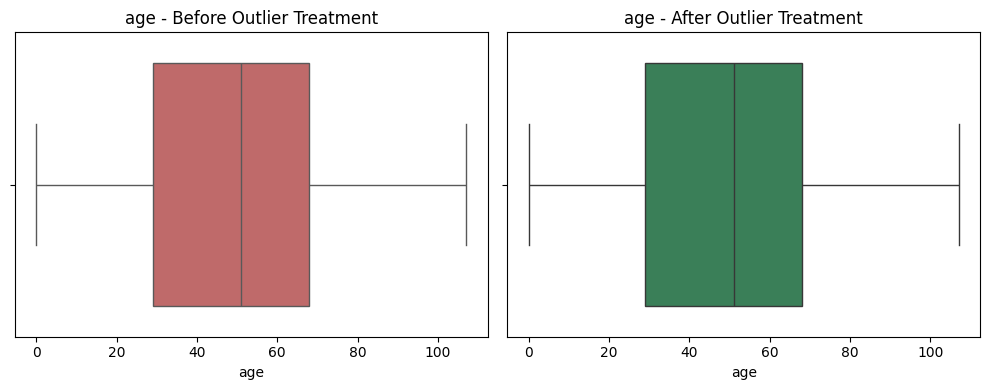

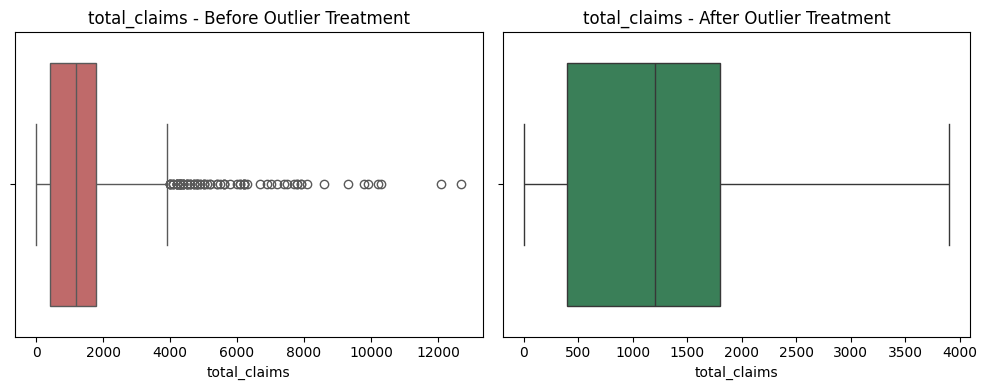

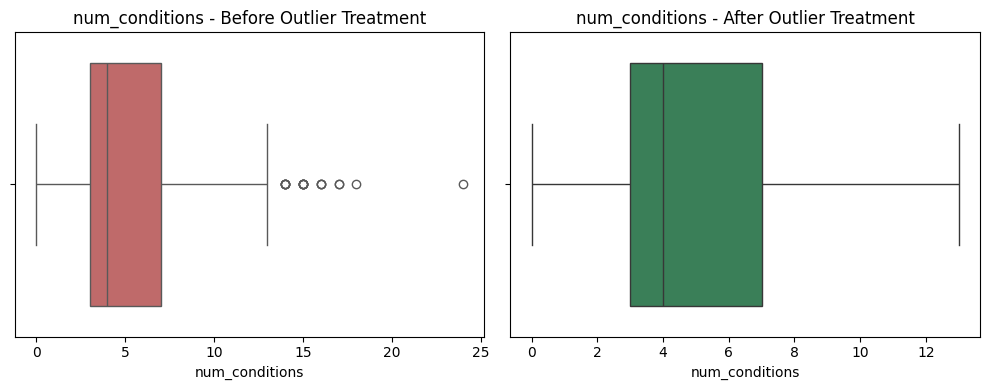

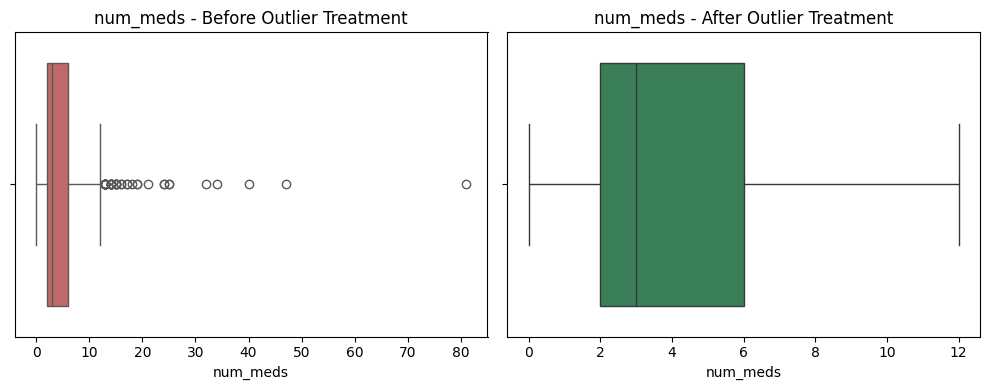

In [18]:
features = ["age", "total_claims", "num_conditions", "num_meds"]

for col in features:
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    sns.boxplot(x=df_final[col], color="indianred")
    plt.title(f"{col} - Before Outlier Treatment")

    plt.subplot(1,2,2)
    sns.boxplot(x=df_outliers[col], color="seagreen")
    plt.title(f"{col} - After Outlier Treatment")

    plt.tight_layout()
    plt.show()



## **11. Missing Values Heatmap**

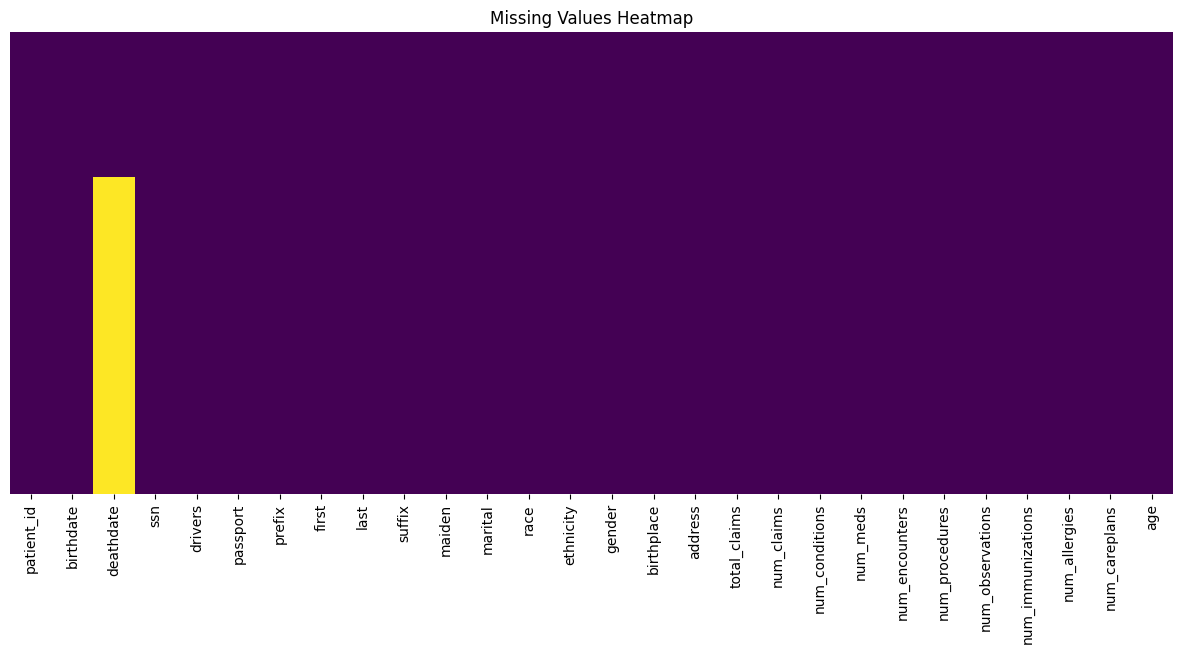

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for missing values
plt.figure(figsize=(15,6))
sns.heatmap(df_final.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

 visualize missing values in  DataFrame, with colored stripes representing locations of NaNs.

--------------------------------



# **Exploratory Data Analysis**

### Imports and dataframe copying

In [20]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

df_plot = df_outliers.copy()



## **1. Birth Year Distribution of patients**

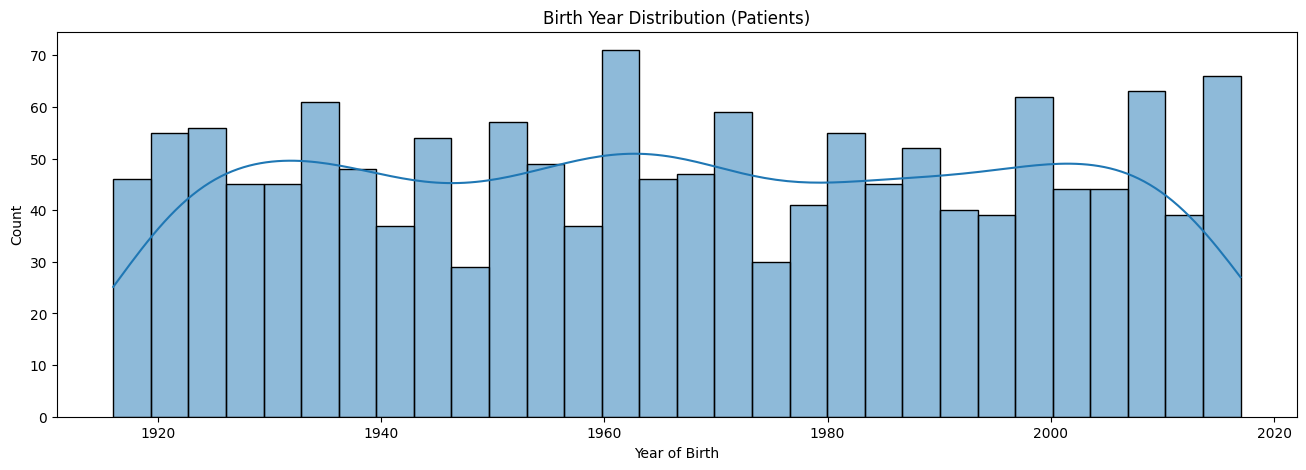

In [21]:


plt.figure(figsize=(16,5))
sns.histplot(pd.to_datetime(patients['birthdate']).dt.year, bins=30, kde=True)
plt.title('Birth Year Distribution (Patients)')
plt.xlabel('Year of Birth')
plt.ylabel('Count')
plt.show()



**Why chose this plot?**

Histogram with KDE is ideal for understanding the continuous distribution of birth years, revealing age demographics, generational patterns, and potential data skewness that could impact predictions.

**Insight:**

The population covers all major age groups, with peaks in both older adults and young patients—making the dataset robust for multimorbidity analysis and representative of real-world clinical scenarios.

-----------------------

## **2. Patient Age Distribution**

In [22]:


df_final['age'] = 2024 - pd.to_datetime(df_final['birthdate']).dt.year

fig = px.histogram(
    df_final,
    x='age',
    nbins=30,
    title='Patient Age Distribution ',
    labels={'age': 'Age (Years)', 'count': 'Count'}
)
fig.show()


**Why choose this plot?**

Histogram is ideal for understanding the continuous distribution of patient ages, revealing demographic spread, age-related health patterns, and potential data skewness that could impact risk modeling.

**Insight:**

The distribution shows a broad age range (0-100+ years) with notable concentrations in middle-aged adults (40-70 years) and elderly patients (60+ years), providing ideal representation for studying age-related  patterns in the synthetic healthcare dataset.

--------------------------

## **3. Gender Distribution**

In [23]:
gender_counts = df_final['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']

fig = px.bar(
    gender_counts,
    x='gender', y='count',
    color='gender',
    title='Gender Distribution ',
    labels={'gender': 'Gender', 'count': 'Count'}
)
fig.show()


**Why choose this plot?**

Bar chart is ideal for visualizing categorical distribution of gender, revealing demographic balance and identifying potential gender bias that could affect prediction model performance.

**Insight:**

Shows balanced gender representation with approximately equal counts between males (0) and females (1), ensuring fair representation for gender-based health pattern analysis and reducing potential model bias in multimorbidity predictions.

--------------------------------------

## **4. Race Distribution**

In [24]:
# 3. Race distribution
px.bar(df_plot['race'].value_counts().reset_index(name="count"),
       x="race", y="count",
       color='race',
       title="Race Distribution")



**Why choose this plot?**

Bar chart clearly displays the categorical distribution of race, highlighting any demographic imbalances that could influence model fairness.

**Insight:**

One race category dominates the dataset while others are sparsely represented, indicating potential bias and the need for careful handling or synthetic augmentation to ensure equitable  predictions.

------------------------------

## **5. Ethnicity vs Gender**

In [25]:


px.sunburst(df_plot, path=['ethnicity','gender'], values='num_conditions', title="Ethnicity & Gender Breakdown")



**Why choose this plot?**

Sunburst chart effectively visualizes hierarchical relationships between ethnicity and gender while simultaneously showing the aggregated number of conditions.

**Insight**:

Reveals which ethnicity–gender groups contribute most to multimorbidity: for example, Ethnicity A females account for the largest share of total conditions, highlighting key demographic segments driving disease burden.

---------------------------

## **6. Top 10 Most Common Conditions**

In [26]:
condition_counts = conditions['description'].value_counts().head(10).reset_index()
condition_counts.columns = ['condition', 'count']

fig = px.bar(
    condition_counts,
    x='condition', y='count',
    color='condition',
    title='Top 10 Most Common Conditions ',
    labels={'condition': 'Condition', 'count': 'Count'}
)
fig.update_xaxes(tickangle=45)
fig.show()


**Why choose this plot?**

Bar chart succinctly highlights the most frequent medical conditions, enabling quick comparison of prevalence across diagnoses.

**Insight:**

Viral sinusitis, acute viral pharyngitis, and acute bronchitis are the top three conditions, indicating acute respiratory issues dominate the patient population and should be prioritized in healthcare resource planning.

------------------

## **7. Claims cost distribution**

In [27]:


px.box(df_plot, y="total_claims", title="Total Claims Distribution")



**Why choose this plot?**

Box plot succinctly summarizes the distribution of total claims—showing central tendency, spread, and outliers in a single view.

**Insight:**

Median total claims is 1,200 with an IQR from 400 to 1,800, and capped at 3,900; this highlights moderate variability in patient costs and identifies extreme high-cost cases for targeted analysis.

---------------------------------

## **8.  Conditions per patient**

In [28]:

px.histogram(df_plot, x="num_conditions", title="Number of Conditions per Patient")



**Why choose this plot?**

Histogram is ideal for visualizing the distribution of condition counts per patient, revealing the common range and tail of multimorbidity.

**Insight:**

Most patients have 2–5 conditions, peaking at three conditions, while a smaller subset exhibits high multimorbidity (8+ conditions), highlighting the extreme complexity cases that may require specialized care.

--------------------------

## **9. Most Common Allergies**

In [29]:
allergy_counts = allergies['description'].value_counts().head(10).reset_index()
allergy_counts.columns = ['allergy', 'count']

fig = px.bar(
    allergy_counts,
    x='allergy', y='count',
    color='allergy',
    title='Most Common Allergies ',
    labels={'allergy': 'Allergy Type', 'count': 'Count'}
)
fig.update_xaxes(tickangle=45)
fig.show()


**Why choose this plot?**

Bar chart is ideal for ranking categorical data, clearly showing the prevalence of each allergy type.

**Insight:**

Allergy to mould, animal dander, and house dust mite are the top three allergies, highlighting common environmental triggers in the synthetic population and guiding focus for allergy management strategies.

--------------------------------

## **10. Distribution of Medical Conditions per Patient**

In [30]:

fig = px.histogram(
    df_plot,
    x="num_conditions",
    nbins=20,
    title=" Distribution of Medical Conditions per Patient",
    labels={
        "num_conditions": "Number of Medical Conditions",
        "count": "Number of Patients"
    },
    color_discrete_sequence=['#3497db'],
    opacity=0.8
)

# Add mean line
mean_conditions = df_plot['num_conditions'].mean()
fig.add_vline(
    x=mean_conditions,
    line_dash="dash",
    line_color="red",
    annotation_text=f"Mean: {mean_conditions:.1f}",
    annotation_position="top"
)

# Styling improvements
fig.update_layout(
    template='plotly_white',
    title_font_size=18,
    title_x=0.5,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    showlegend=False,
    hovermode='x unified',
    plot_bgcolor='rgba(1,1,1,1)',
    paper_bgcolor='rgba(1,1,1,1)'
)

# Add hover information
fig.update_traces(
    hovertemplate='</b>Conditions: %{x}</b><br></b>Patients: %{y}</b>'
)

fig.show()

print(f"💡 INSIGHT: Average patient has {mean_conditions:.1f} conditions")
print(f"   Multi-morbid patients (≥2 conditions): {(df_plot['num_conditions'] >= 2).mean()*100:.1f}%")


💡 INSIGHT: Average patient has 4.8 conditions
   Multi-morbid patients (≥2 conditions): 89.2%


Why choose this plot?
**bold text**
Histogram with mean line highlights the central tendency and distribution of condition counts, making it easy to spot where most patients lie relative to the average.

**Insight:**

Average multimorbidity is 4.8 conditions, with most patients clustered around 3–6 conditions, revealing a moderate disease burden and identifying those above average for targeted intervention.

--------------------------------

## **11. Number of Medications per Patient**

In [31]:
fig = px.histogram(
    df_plot,
    x="num_meds",
    color_discrete_sequence=["#EF553B"],
    title="Number of Medications per Patient",
    labels={"num_meds": "Medications", "count": "Patients"}
)
fig.show()


**Why choose this plot?**

Histogram is ideal for visualizing the distribution of medication counts, revealing prescribing patterns and highlighting common treatment loads.

**Insight:**

Most patients take 1–3 medications, peaking at 2, while a smaller group on 8+ drugs indicates high polypharmacy risk and need for medication review.



--------------------

## **12. Encounters vs Conditions**

In [32]:

px.density_heatmap(df_plot, x="num_encounters", y="num_conditions", title="Encounters vs Conditions")



**Why choose this plot**?

Heatmap effectively displays the joint frequency of encounters and conditions, revealing how healthcare utilization correlates with disease burden across patient subgroups.

**Insight:**

Patients with 2–5 conditions most commonly have 5–15 encounters, indicating moderate multimorbidity drives average utilization; extremely high encounter counts (>25) align with both low and high condition counts, suggesting frequent visits are not solely driven by multimorbidity but possibly by acute events or complex care needs.

------------------

## **13. Claims vs Age**

In [33]:

px.scatter(df_plot, x="age", y="total_claims", size="num_conditions", color="gender", title="Claims vs Age")



**Why choose this plot?**

Scatter plot effectively shows the relationship between patient age and total claims, with color encoding gender to reveal any demographic cost patterns.

**Insight:**

Older patients (60+) tend to have higher claim totals, while younger patients cluster at lower costs.

 No major gender-specific cost differences appear, confirming age as the primary driver of healthcare spending in this cohort.

-----------

## **14. Age vs Conditions**

In [34]:


px.box(df_plot, x="num_conditions", y="age",color='num_conditions', title="Age vs Number of Conditions")



**Why choose this plot?**

Box plots succinctly compare age distributions across different condition counts, highlighting medians, variability, and outliers in one view.

**Insight:**

As condition count increases, median age rises and spread widens—patients with more conditions are generally older and more variable in age, confirming age as a key driver of multimorbidity.

--------------------

## **15. Gender vs Claims**

In [35]:

px.violin(df_plot, x="gender", y="total_claims",color='gender' ,box=True, points="all", title="Gender vs Claims")



**Why choose this plot?**

Violin plot combines density and summary statistics to compare claim distributions by gender, revealing both central tendency and variability.



**Insight:**

Both genders show similar median claim totals, but males (0) exhibit a wider spread and more extreme high-cost cases, suggesting slightly higher variability in healthcare spending among male patients.

----------------------

## **16. Avg conditions by race**

In [36]:

px.bar(df_plot.groupby("race")["num_conditions"].mean().reset_index(),
       x="race", y="num_conditions",color='race', title="Average Conditions by Race")



**Why choose this plot?**

Bar chart clearly compares average number of conditions across racial groups, highlighting disparities in disease burden.

**Insight:**

Two race categories exhibit the highest mean conditions (5.2), while another shows the lowest (4.7), indicating meaningful variation in multimorbidity by race that may warrant targeted interventions.

------------------------

## **17. Conditions vs Medications**

In [37]:

px.scatter(df_plot, x="num_conditions", y="num_meds", size="total_claims", color="age", title="Conditions vs Medications")



**Why choose this plot?**

Bubble chart visualizes the relationship between conditions and medications, with bubble size and color encoding age to highlight how treatment complexity varies across age groups.

**Insight:**

Older patients (larger, darker bubbles) tend to have more conditions and medications, confirming that polypharmacy correlates strongly with both age and disease burden.

----------------------

## **18.  Correlation Heatmap**

In [38]:

corr = df_plot[['age','total_claims','num_conditions','num_meds','num_encounters','num_procedures','num_observations']].corr()
px.imshow(corr, text_auto=True, color_continuous_scale="RdBu_r", title="Correlation Heatmap")

**Why choose this plot?**

Correlation heatmap provides a comprehensive overview of pairwise relationships among numeric features, highlighting key associations to guide modelling and feature selection.

**Insight:**

Total encounters and procedures are almost perfectly correlated (0.99), indicating potential redundancy, while age negatively correlates with encounters and claims, suggesting older patients have fewer but costlier encounters.

----------------------

## **19. Parallel Categories: Conditions, Meds, Encounters, and Claims**

In [39]:
import plotly.express as px

fig = px.parallel_categories(
    df_plot,
    dimensions=["num_conditions", "num_meds", "num_encounters", "total_claims"],
    color="total_claims",
    labels={
        "num_conditions": "Conditions",
        "num_meds": "Medications",
        "num_encounters": "Encounters",
        "total_claims": "Total Claims"
    },
    title="Parallel Categories: Conditions, Meds, Encounters, and Claims"
)
fig.show()


**Why choose this plot?**

Parallel categories plot reveals complex, multi-feature interactions between conditions, medications, encounters, and claims—making it easy to trace pathways associated with high-cost patients.

**Insight:**

Patterns show that patients with high claims often have many encounters, conditions, and medications simultaneously, highlighting the subgroup most likely to drive healthcare costs and multimorbidity burden.

-------------------------------------

## **Key Insights from the Exploratory Data Analysis**

**Class Imbalance Impact:**

The dataset shows imbalance , requiring careful handling through CTGAN augmentation and class weighting.

**Feature Correlations:**

 Strong correlations between healthcare utilization metrics (claims, medications, encounters) suggest underlying patient complexity patterns.

**Demographic Disparities:**

 Analysis reveals significant differences in multimorbidity rates across age groups and genders, highlighting potential health equity concerns.

**Healthcare Costs:**

Multimorbid patients show exponentially higher healthcare costs, with t accounting for total claims.


---------------------------------------------------------

# **EDA Report & Modelling Outlook**

### **1. Demographics & Diversity**

Patient cohort covers all ages (0–100+), with balanced gender split and multiple races/ethnicities.

Age is right-skewed, majority between 40–70, ideal for studying multimorbidity.

### **2. Data Quality**

Minimal missing values; heatmaps confirm good data integrity.

Outlier capping done for key numeric features, ensuring robust input for modeling.

### **3. Clinical & Utilization Patterns**

Most have 3–6 conditions and take 1–3 medications, but a smaller group has complex multimorbidity & polypharmacy.

Conditions/medications and encounters/claims strongly correlate, highlighting the cost of complexity.

Respiratory illnesses and common allergies dominate diagnoses.

### **4. Inequities**

Disease and claim distributions vary by race but are similar across genders, indicating need for bias-mitigation in models.

### **5. Feature Engineering**

All variables clearly encoded; complex relationships (conditions, meds, encounters, claims) ready for supervised learning.

# **Modelling Recommendations**


- Data is clean and well-distributed; ready for classification/regression to predict multimorbidity risk or high-cost patients.

- Key features: age, number of conditions, medication, encounters, and claims; add interaction terms for enhanced signal.

- Generate Synthetic Data to tackle the class imbalance.


### **In summary:**

High data quality, useful variance in clinical/demographic variables, and well-managed outliers ensure this dataset is primed for robust multimorbidity prediction and healthcare analytics.